In [60]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [61]:
from sklearn.metrics import accuracy_score
def get_prediction_acc(clf, x_test, y_test):
  y_pred = clf.predict(x_test)
  return accuracy_score(y_test, y_pred)

In [62]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(clf, xx, yy, ax=plt, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

In [63]:
# building scatter plot for 2D data
def build_scatter(clf, x_test, y_test, size: tuple = None,
                  x_label = 'X1', y_label = 'X2'):
  X0, X1 = x_test[:, 0], x_test[:, 1]
  xx, yy = make_meshgrid(X0, X1)

  plt.figure(figsize=size)

  plot_contours(clf, xx, yy,
                cmap=plt.cm.coolwarm, alpha=0.8)
  plt.scatter(X0, X1, c=y_test, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.xticks(())
  plt.yticks(())
  plt.show()

### Задание 1

In [64]:
def load_spam():
    nparr = pd.read_csv('spam.csv', delimiter=',').to_numpy()
    Y = nparr[:, -1]
    Y[Y == 'spam'] = 1
    Y[Y == 'nonspam'] = 0
    Y=Y.astype('int')
    X = np.delete(nparr, [len(nparr[0]) - 1, 0], axis=1)
    X=X.astype('float')
    return X, Y

In [65]:
def load_tictac():
    nparr = pd.read_csv('tic_tac_toe.txt', delimiter=',', header=None).to_numpy()
    Y = nparr[:, -1]
    Y[Y == 'positive'] = 1
    Y[Y == 'negative'] = 0
    Y=Y.astype('int')
    X = np.delete(nparr, [len(nparr[0]) - 1], axis=1)
    X[X == 'b'] = 0
    X[X == 'x'] = 1
    X[X == 'o'] = 2
    X=X.astype('int')
    return X, Y

In [66]:
X, Y = load_tictac()

In [67]:
X

array([[1, 1, 1, ..., 1, 2, 2],
       [1, 1, 1, ..., 2, 1, 2],
       [1, 1, 1, ..., 2, 2, 1],
       ...,
       [2, 1, 2, ..., 1, 2, 1],
       [2, 1, 2, ..., 1, 2, 1],
       [2, 2, 1, ..., 2, 1, 1]])

In [68]:
from sklearn.naive_bayes import GaussianNB

In [69]:
succ_rates = []
test_sizes = [i for i in np.arange(0.1, 1.0, 0.01)]
for i in test_sizes:
    succ_rates_temp = np.array([])
    for j in range(100):
        gnb = GaussianNB()
        x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=i, random_state=j)
        y_pred = gnb.fit(x_train, y_train)
        succ_rates_temp = np.append(succ_rates_temp, get_prediction_acc(gnb, x_test, y_test))
    succ_rates.append(np.mean(succ_rates_temp))
print(succ_rates)


[0.7258333333333333, 0.7224528301886792, 0.721826086956522, 0.7207999999999999, 0.7188148148148149, 0.7199305555555555, 0.7177922077922078, 0.7198159509202456, 0.7185549132947977, 0.7191256830601093, 0.7184895833333335, 0.7177227722772278, 0.7159715639810424, 0.7167873303167421, 0.7163478260869567, 0.7160416666666666, 0.7152400000000001, 0.7146332046332047, 0.7145724907063198, 0.714568345323741, 0.7152083333333334, 0.7150505050505054, 0.7120521172638437, 0.7119242902208203, 0.7120858895705521, 0.7111011904761907, 0.7115652173913044, 0.7113239436619719, 0.7105479452054796, 0.7093048128342245, 0.70875, 0.7076335877862596, 0.7074441687344915, 0.7072815533980582, 0.7070142180094787, 0.7073842592592595, 0.7070975056689344, 0.7073614190687362, 0.7063695652173914, 0.7055531914893618, 0.7053027139874739, 0.7051329243353784, 0.7045290581162326, 0.7044094488188974, 0.7034169884169884, 0.7028462998102465, 0.7039106145251397, 0.703254113345521, 0.702410071942446, 0.7023144876325087, 0.701269565217

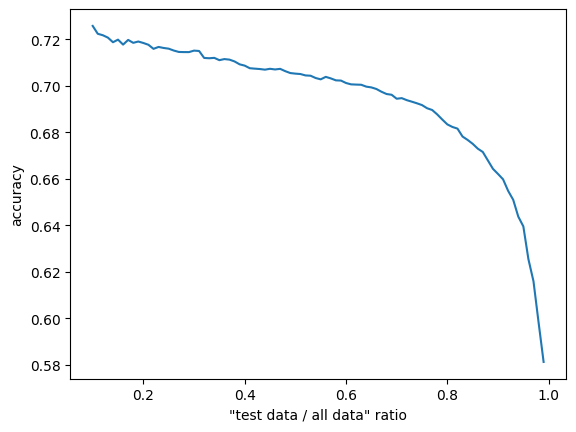

In [70]:
plt.plot(test_sizes, succ_rates)
plt.ylabel('accuracy')
plt.xlabel('"test data / all data" ratio')
plt.show()

##Задание 2

In [71]:
#class -1
x1_1 = 22
x2_1 = 24
D_1 = 4
N1 = 40
sd_1 = np.sqrt(D_1)

arr_11 = np.random.normal(x1_1, sd_1, N1).reshape(-1, 1)
arr_12 = np.random.normal(x2_1, sd_1, N1).reshape(-1, 1)

X1 = np.concatenate((arr_11, arr_12), axis=1)
Y1 = np.full(len(X1), -1)
Y1

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1])

In [72]:
#class 1
x1_2 = 8
x2_2 = 12
D_2 = 3
N2 = 60
sd_2 = np.sqrt(D_2)

arr_21 = np.random.normal(x1_2, sd_2, N2).reshape(-1, 1)
arr_22 = np.random.normal(x2_2, sd_2, N2).reshape(-1, 1)

legend = ('class -1', 'class 1')

X2 = np.concatenate((arr_21, arr_22), axis=1)
Y2 = np.full(len(X2), 1)
Y2

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

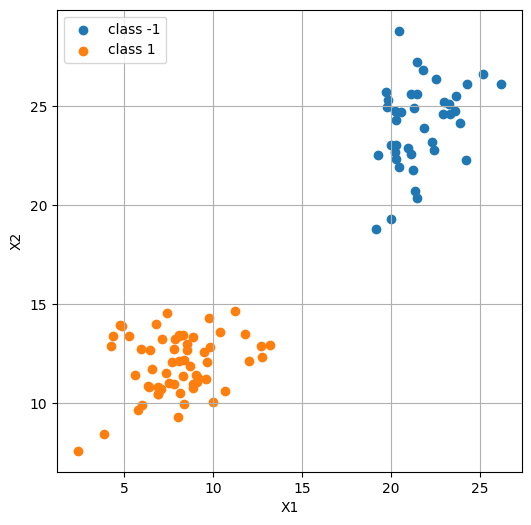

In [73]:
plt.figure(figsize=(6, 6))

plt.scatter(X1[:, 0], X1[:, 1])
plt.scatter(X2[:, 0], X2[:, 1])

plt.xlabel('X1')
plt.ylabel('X2')

plt.legend(legend)

plt.grid(True)

plt.show()

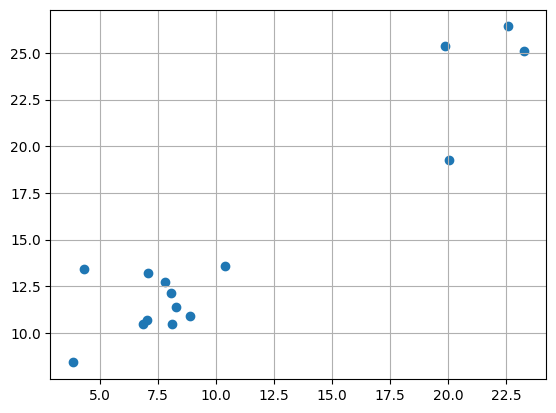

In [74]:
X = np.concatenate((X1, X2))
Y = np.concatenate((Y1, Y2))
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15)

# train data
plt.scatter(x_test[:, 0], x_test[:, 1])
plt.grid(True)
plt.show()

In [75]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix

In [76]:
clf = GaussianNB()
clf.fit(x_train, y_train)

get_prediction_acc(clf, x_test, y_test)

1.0

[[1.06128265e-15 1.00000000e+00]
 [4.83734608e-24 1.00000000e+00]
 [1.00000000e+00 2.86236672e-10]
 [1.00000000e+00 1.16951176e-26]
 [1.00000000e+00 2.89945863e-23]
 [2.08282525e-35 1.00000000e+00]
 [3.43795396e-22 1.00000000e+00]
 [1.00000000e+00 4.16762874e-29]
 [4.96521522e-26 1.00000000e+00]
 [1.23817335e-26 1.00000000e+00]
 [5.07960277e-22 1.00000000e+00]
 [1.40406969e-28 1.00000000e+00]
 [5.39622942e-22 1.00000000e+00]
 [8.27512310e-23 1.00000000e+00]
 [1.20253463e-22 1.00000000e+00]]


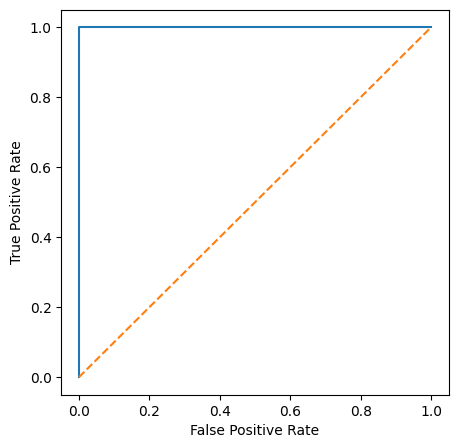

In [77]:
probs = clf.predict_proba(x_test)
print(probs)
probs = probs[:, 1]

fpr, tpr, _ = roc_curve(y_test, probs)

plt.figure(figsize=(5, 5))

plt.plot(fpr, tpr)

plt.plot([0, 1], [0, 1], linestyle='--')

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.show()

In [78]:
y_pred = clf.predict(x_test)
confusion_matrix(y_test, y_pred)

array([[ 4,  0],
       [ 0, 11]])

In [79]:
from sklearn.metrics import precision_recall_curve

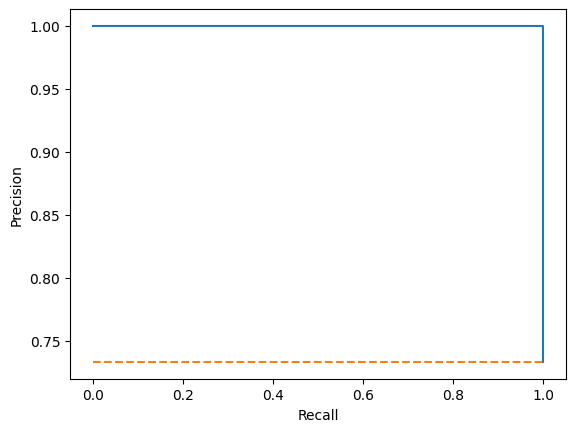

In [80]:
prec, recall, _ = precision_recall_curve(y_test, probs)
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot(recall, prec)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

## Задание 3

In [81]:
from sklearn.neighbors import KNeighborsClassifier

In [82]:
nparr = pd.read_csv('glass.csv', delimiter=',').to_numpy()
Y = nparr[:, -1]
Y=Y.astype('int')

X = np.delete(nparr, [len(nparr[0]) - 1, 0], axis=1)
X=X.astype('float')

In [83]:
k_s = [i for i in range(1, 100)]

In [84]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15)
neigh = KNeighborsClassifier(n_neighbors=2)
neigh.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [85]:
succ_rates = []
for i in k_s:
  succ_rates_temp = np.array([])
  succ_rates_temp = np.array([])
  neigh = KNeighborsClassifier(n_neighbors=i)
  neigh.fit(x_train, y_train)
  succ_rates.append(get_prediction_acc(neigh, x_test, y_test))

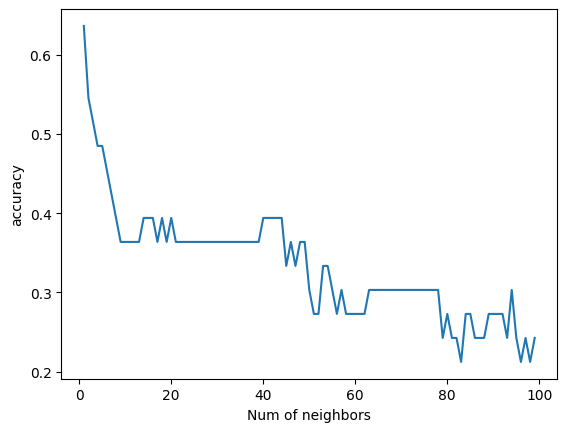

array([7, 2, 2, 2, 7, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 5, 6, 2, 6, 2, 5, 7,
       2, 3, 3, 2, 2, 6, 2, 1, 2, 3, 3])

In [86]:
plt.plot(k_s, succ_rates)
plt.ylabel('accuracy')
plt.xlabel('Num of neighbors')
plt.show()
y_test

In [87]:
neigh = KNeighborsClassifier(n_neighbors=7)
neigh.fit(x_train, y_train)
get_prediction_acc(neigh, x_test, y_test)

0.42424242424242425

In [88]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train, y_train).predict([[1.516, 11.7, 1.01, 1.19, 72.59, 0.43, 11.44, 0.02, 0.1]])[0]

5

## Задание 4

In [89]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import svm

In [90]:
def get_X_Y(arr):
  Y = arr[:, -1]
  Y[Y == 'red'] = 0
  Y[Y == 'green'] = 1
  Y=Y.astype('int')

  X = np.delete(arr, [len(arr[0]) - 1], axis=1)
  X=X.astype('float')
  return X, Y

In [91]:
import io
def load_train_test(t):
  nparr = pd.read_csv('svmdata_'+ t + '.txt', delimiter='\t').to_numpy()
  nparr_test = pd.read_csv('svmdata_'+ t + '_test.txt', delimiter='\t').to_numpy()
  np.random.shuffle(nparr)
  np.random.shuffle(nparr_test)
  return nparr, nparr_test

### a

In [92]:
nparr, nparr_test = load_train_test('a')

In [93]:
x_train, y_train = get_X_Y(nparr)
x_test, y_test = get_X_Y(nparr_test)

In [94]:
clf = svm.SVC(kernel='linear', gamma='auto')

In [95]:
clf.fit(x_train, y_train)

SVC(gamma='auto', kernel='linear')

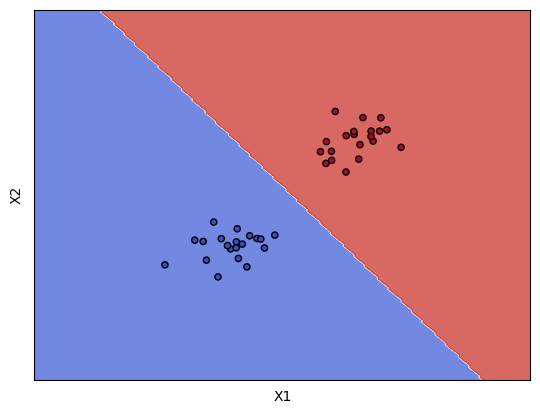

In [96]:
build_scatter(clf, x_test, y_test, x_label='X1', y_label='X2')

In [97]:
clf.support_vectors_

array([[0.20454273, 0.00740181],
       [0.14874741, 0.13128834],
       [0.18027464, 0.29152253],
       [0.80835351, 0.82126184],
       [0.98510067, 0.68430049],
       [0.90356343, 0.72236951]])

In [98]:
from sklearn.metrics import confusion_matrix

In [99]:
y_pred = clf.predict(x_test)
confusion_matrix(y_test, y_pred)

array([[20,  0],
       [ 0, 20]])

### b

In [100]:
nparr, nparr_test = load_train_test('b')

In [101]:
x_train, y_train = get_X_Y(nparr)
x_test, y_test = get_X_Y(nparr_test)

In [102]:
succ_rates = []
c_s = [i for i in np.arange(0.0000000001, 500)]

for i in c_s:
  clf = svm.SVC(kernel='linear', C=i)
  clf.fit(x_train, y_train)
  succ_rates.append(get_prediction_acc(clf, x_train, y_train))

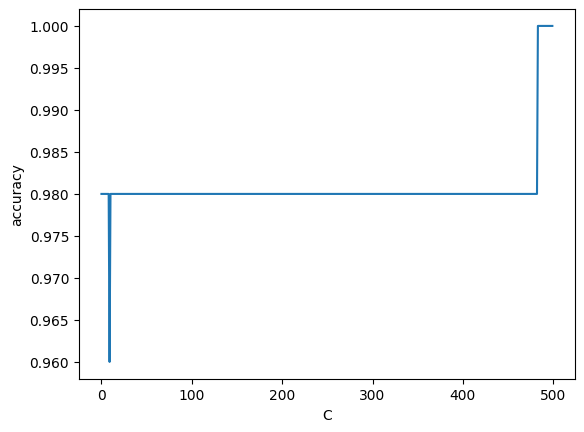

In [103]:
plt.plot(c_s, succ_rates)
plt.xlabel('C')
plt.ylabel('accuracy')
plt.show()

In [104]:
clf = svm.SVC(kernel='linear', C=200)
clf.fit(x_train, y_train)
get_prediction_acc(clf, x_test, y_test)

0.98

### c

In [105]:
nparr, nparr_test = load_train_test('c')

In [106]:
x_train, y_train = get_X_Y(nparr)
x_test, y_test = get_X_Y(nparr_test)

In [107]:
C = 1.0
models = (svm.SVC(kernel='linear', C=C),
          svm.SVC(kernel='rbf', C=C),
          svm.SVC(kernel='sigmoid', C=C),
          svm.SVC(kernel='poly', degree=1, gamma='auto', C=C),
          svm.SVC(kernel='poly', degree=2, gamma='auto', C=C),
          svm.SVC(kernel='poly', degree=3, gamma='auto', C=C),
          svm.SVC(kernel='poly', degree=4, gamma='auto', C=C),
          svm.SVC(kernel='poly', degree=5, gamma='auto', C=C))
titles = ('SVC with linear kernel',
          'SVC with RBF kernel',
          'SVC with Sigmoid kernel',
          'SVC with polynomial (degree 1) kernel',
          'SVC with polynomial (degree 2) kernel',
          'SVC with polynomial (degree 3) kernel',
          'SVC with polynomial (degree 4) kernel',
          'SVC with polynomial (degree 5) kernel')

models = [clf.fit(x_train, y_train) for clf in models]

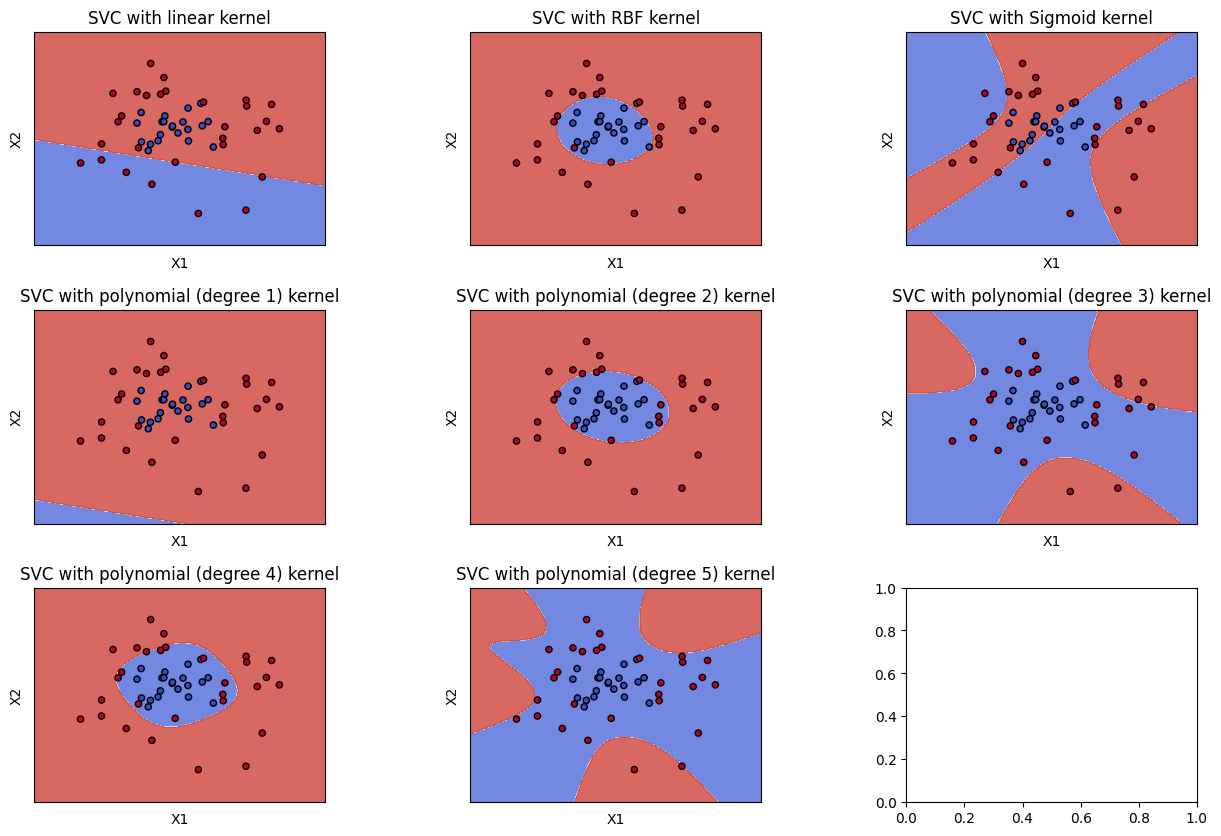

In [108]:
fig, sub = plt.subplots(3, 3, figsize=(15, 10))
plt.subplots_adjust(wspace=.5, hspace=.3)

# from matplotlib.pyplot import figure
# figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

X0, X1 = x_test[:, 0], x_test[:, 1]
xx, yy = make_meshgrid(X0, X1)
for clf, title, ax, i in zip(models, titles, sub.flatten(), range(len(models))):
    plot_contours(clf, xx, yy, ax,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y_test, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
    # ax.title.set_position([.5, 1.1])
plt.show()

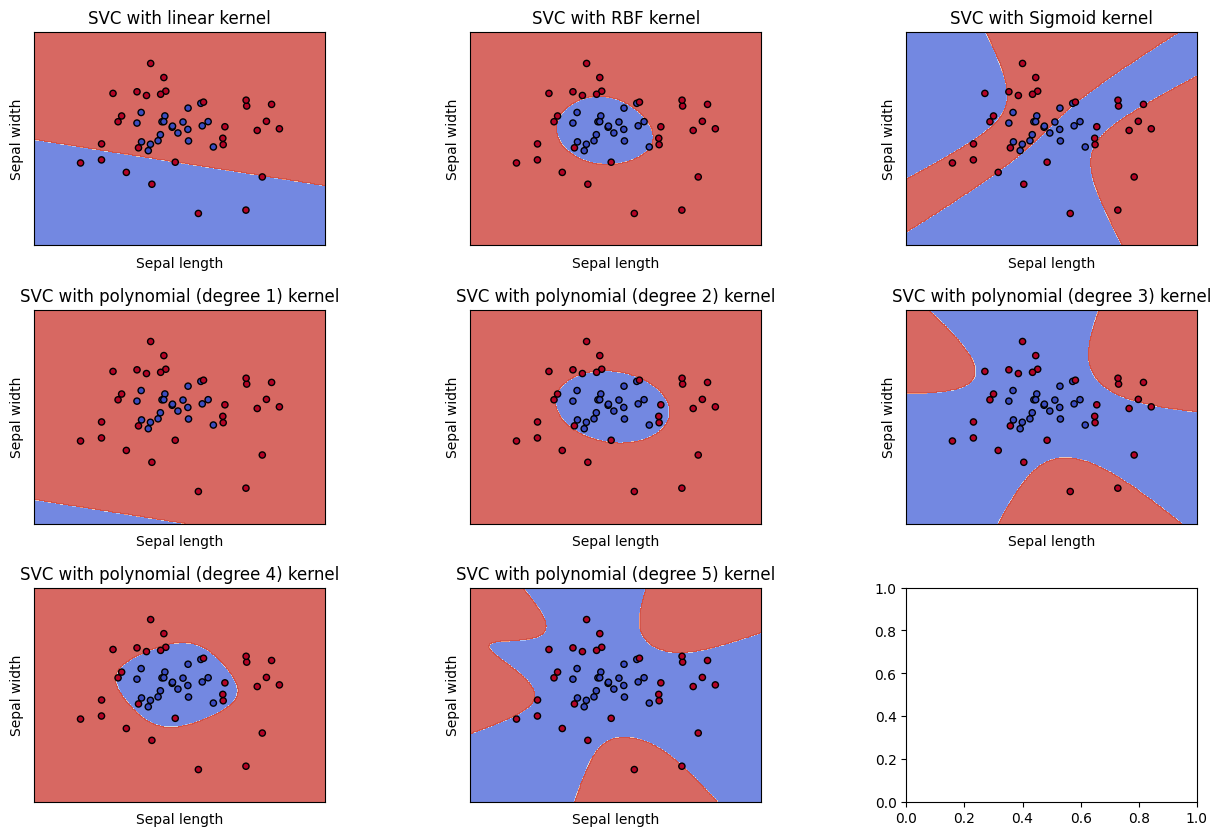

In [109]:
fig, sub = plt.subplots(3, 3, figsize=(15, 10))
plt.subplots_adjust(wspace=.5, hspace=.3)

X0, X1 = x_test[:, 0], x_test[:, 1]
xx, yy = make_meshgrid(X0, X1)
for clf, title, ax, i in zip(models, titles, sub.flatten(), range(len(models))):
    plot_contours(clf, xx, yy, ax,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y_test, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
    # ax.title.set_position([.5, 1.1])
plt.show()

In [110]:
print('-'*50)

res = []

for i in range(len(models)):
  # y_pred = models[i].predict(x_test)
  # print(titles[i] + ':')
  # print(confusion_matrix(y_test, y_pred))
  # print('-'*50)
  # len(y_test[y_test == 1])

  res.append((titles[i], get_prediction_acc(models[i], x_test, y_test)))

  # print(titles[i] + ':', str(get_prediction_acc(models[i], x_test, y_test)) + '%')

res.sort(key=lambda res:-res[1])

for i in res:
  print(i[0] + ':', str(i[1]) + '%')


--------------------------------------------------
SVC with RBF kernel: 0.94%
SVC with polynomial (degree 2) kernel: 0.84%
SVC with polynomial (degree 4) kernel: 0.8%
SVC with polynomial (degree 1) kernel: 0.58%
SVC with polynomial (degree 3) kernel: 0.54%
SVC with polynomial (degree 5) kernel: 0.46%
SVC with Sigmoid kernel: 0.44%
SVC with linear kernel: 0.42%


### d

In [111]:
nparr, nparr_test = load_train_test('d')

In [112]:
x_train, y_train = get_X_Y(nparr)
x_test, y_test = get_X_Y(nparr_test)

In [113]:
C = 1.0
models = (svm.SVC(kernel='rbf', C=C),
          svm.SVC(kernel='sigmoid', C=C),
          svm.SVC(kernel='poly', degree=1, gamma='auto', C=C),
          svm.SVC(kernel='poly', degree=2, gamma='auto', C=C),
          svm.SVC(kernel='poly', degree=3, gamma='auto', C=C),
          svm.SVC(kernel='poly', degree=4, gamma='auto', C=C),
          svm.SVC(kernel='poly', degree=5, gamma='auto', C=C))
titles = ('SVC with RBF kernel',
          'SVC with Sigmoid kernel',
          'SVC with polynomial (degree 1) kernel',
          'SVC with polynomial (degree 2) kernel',
          'SVC with polynomial (degree 3) kernel',
          'SVC with polynomial (degree 4) kernel',
          'SVC with polynomial (degree 5) kernel')

models = [clf.fit(x_train, y_train) for clf in models]

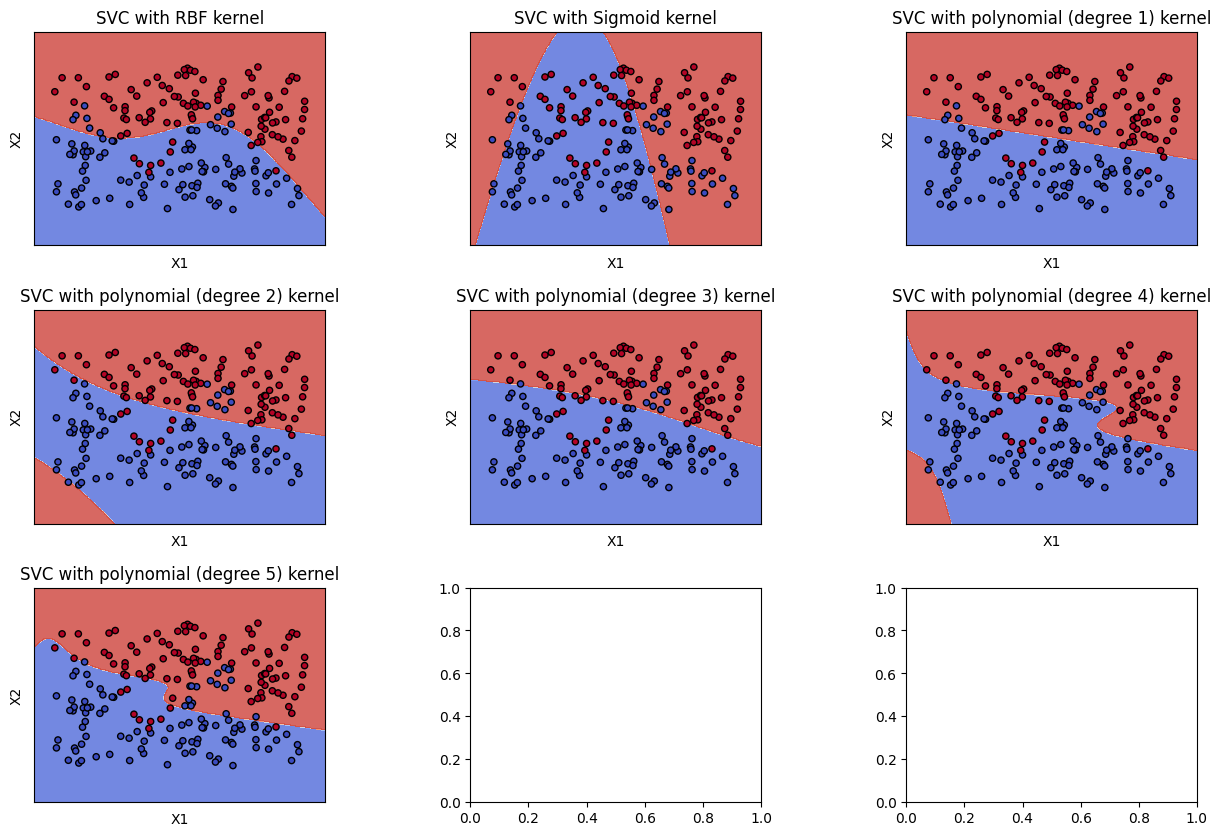

In [114]:
fig, sub = plt.subplots(3, 3, figsize=(15, 10))
plt.subplots_adjust(wspace=.5, hspace=.3)

# from matplotlib.pyplot import figure
# figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

X0, X1 = x_test[:, 0], x_test[:, 1]
xx, yy = make_meshgrid(X0, X1)
for clf, title, ax, i in zip(models, titles, sub.flatten(), range(len(models))):
    plot_contours(clf, xx, yy, ax,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y_test, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
    # ax.title.set_position([.5, 1.1])
plt.show()

In [115]:
print('-'*50)

res = []

for i in range(len(models)):
  # y_pred = models[i].predict(x_test)
  # print(titles[i] + ':')
  # print(confusion_matrix(y_test, y_pred))
  # print('-'*50)
  # len(y_test[y_test == 1])

  res.append((titles[i], get_prediction_acc(models[i], x_test, y_test)))

  # print(titles[i] + ':', str(get_prediction_acc(models[i], x_test, y_test)) + '%')

res.sort(key=lambda res:-res[1])

for i in res:
  print(i[0] + ':', str(i[1]) + '%')


--------------------------------------------------
SVC with RBF kernel: 0.895%
SVC with polynomial (degree 4) kernel: 0.875%
SVC with polynomial (degree 1) kernel: 0.865%
SVC with polynomial (degree 2) kernel: 0.865%
SVC with polynomial (degree 3) kernel: 0.865%
SVC with polynomial (degree 5) kernel: 0.84%
SVC with Sigmoid kernel: 0.585%


### e

In [116]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn import svm
import io
def load_train_test(t):
  nparr = pd.read_csv('svmdata_'+ t + '.txt', delimiter='\t').to_numpy()
  nparr_test = pd.read_csv('svmdata_'+ t + '_test.txt', delimiter='\t').to_numpy()
  np.random.shuffle(nparr)
  np.random.shuffle(nparr_test)
  return nparr, nparr_test
def get_X_Y(arr):
  Y = arr[:, -1]
  Y[Y == 'red'] = 0
  Y[Y == 'green'] = 1
  Y=Y.astype('int')

  X = np.delete(arr, [len(arr[0]) - 1], axis=1)
  X=X.astype('float')
  return X, Y

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(clf, xx, yy, ax=plt, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out
def get_prediction_acc(clf, x_test, y_test):
  y_pred = clf.predict(x_test)
  return np.sum((y_test==y_pred)) / len(y_pred)

In [117]:
nparr, nparr_test = load_train_test('e')

In [118]:
x_train, y_train = get_X_Y(nparr)
x_test, y_test = get_X_Y(nparr_test)

In [119]:
C = 1.0
g_s = [3000000, 3000, 300000, 300, 100, 100, 10]

for i in range(len(g_s)):
  g_s[i] = 'auto'

models = (svm.SVC(kernel='rbf', gamma=g_s[0], C=C),
          svm.SVC(kernel='sigmoid', gamma=g_s[1], C=C),
          svm.SVC(kernel='poly', degree=1, gamma=g_s[2], C=C),
          svm.SVC(kernel='poly', degree=2, gamma=g_s[3], C=C),
          svm.SVC(kernel='poly', degree=3, gamma=g_s[4], C=C),
          svm.SVC(kernel='poly', degree=4, gamma=g_s[5], C=C),
          svm.SVC(kernel='poly', degree=5, gamma=g_s[6], C=C))
titles = ('SVC with RBF kernel',
          'SVC with Sigmoid kernel',
          'SVC with polynomial (degree 1) kernel',
          'SVC with polynomial (degree 2) kernel',
          'SVC with polynomial (degree 3) kernel',
          'SVC with polynomial (degree 4) kernel',
          'SVC with polynomial (degree 5) kernel') 
for clf, i in zip(models, range((len(models)))):
  clf.fit(x_train, y_train)
  print(i, 'trained')

0 trained
1 trained
2 trained
3 trained
4 trained
5 trained
6 trained


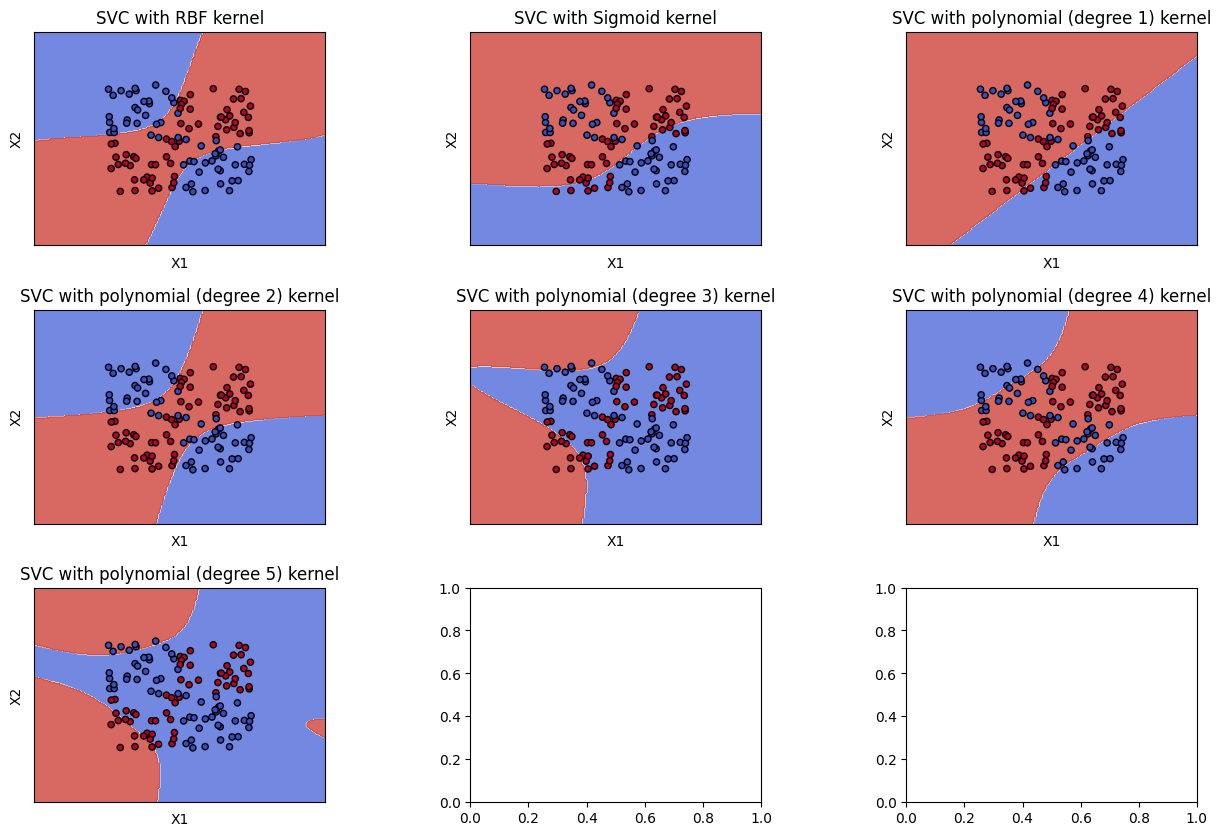

In [120]:
fig, sub = plt.subplots(3, 3, figsize=(15, 10))
plt.subplots_adjust(wspace=.5, hspace=.3)

X0, X1 = x_test[:, 0], x_test[:, 1]
xx, yy = make_meshgrid(X0, X1)
for clf, title, ax, i in zip(models, titles, sub.flatten(), range(len(models))):
    plot_contours(clf, xx, yy, ax,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y_test, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
    # ax.title.set_position([.5, 1.1])
plt.show()

In [121]:
res = []

for i in range(len(models)):
  print(titles[i] + ':', str(get_prediction_acc(models[i], x_test, y_test) * 100) + '%')


SVC with RBF kernel: 89.16666666666667%
SVC with Sigmoid kernel: 62.5%
SVC with polynomial (degree 1) kernel: 65.0%
SVC with polynomial (degree 2) kernel: 90.83333333333333%
SVC with polynomial (degree 3) kernel: 53.333333333333336%
SVC with polynomial (degree 4) kernel: 69.16666666666667%
SVC with polynomial (degree 5) kernel: 48.333333333333336%


## Задание 5

In [122]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from matplotlib.pyplot import figure

### a

In [123]:
nparr = pd.read_csv('glass.csv', delimiter=',').to_numpy()
Y = nparr[:, -1]
Y=Y.astype('int')

X = np.delete(nparr, [len(nparr[0]) - 1, 0], axis=1)
X=X.astype('float')

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15)

In [124]:
depths = [i for i in np.arange(1, 100)]
leaf_nodes = [i for i in range(len(x_train) - 100, len(x_train))]

def get_accuracies(crit):
  acc = []

  for depth in depths:
    clf = DecisionTreeClassifier(criterion=crit, max_depth=depth)
    clf.fit(x_train, y_train)
    acc.append(get_prediction_acc(clf, x_test, y_test))

  return acc

def get_accuracies_ln(crit):
  acc = []

  for ln in leaf_nodes:
    clf = DecisionTreeClassifier(criterion=crit, max_leaf_nodes=ln)
    clf.fit(x_train, y_train)
    print('ln {}% ended'.format(ln / leaf_nodes[-1] * 100))
    acc.append(get_prediction_acc(clf, x_test, y_test))

  return acc


legend = ('Entropy', 'Gini')

# accuracies_depth = [get_accuracies('entropy'),
#                     get_accuracies('gini')]

print('Depth ended')

accuracies_ln = [get_accuracies_ln('entropy'),
                get_accuracies_ln('gini')]

print('leaf nodes ended')

# print(accuracies)
# print(depths)
# clf.predict([[1.516, 11.7, 1.01, 1.19, 72.59, 0.43, 11.44, 0.02, 0.1]])[0]

Depth ended
ln 45.0% ended
ln 45.55555555555556% ended
ln 46.111111111111114% ended
ln 46.666666666666664% ended
ln 47.22222222222222% ended
ln 47.77777777777778% ended
ln 48.333333333333336% ended
ln 48.888888888888886% ended
ln 49.44444444444444% ended
ln 50.0% ended
ln 50.55555555555556% ended
ln 51.11111111111111% ended
ln 51.66666666666667% ended
ln 52.22222222222223% ended
ln 52.77777777777778% ended
ln 53.333333333333336% ended
ln 53.888888888888886% ended
ln 54.44444444444444% ended
ln 55.00000000000001% ended
ln 55.55555555555556% ended
ln 56.111111111111114% ended
ln 56.666666666666664% ended
ln 57.22222222222222% ended
ln 57.77777777777777% ended
ln 58.333333333333336% ended
ln 58.88888888888889% ended
ln 59.44444444444444% ended
ln 60.0% ended
ln 60.55555555555555% ended
ln 61.111111111111114% ended
ln 61.66666666666667% ended
ln 62.22222222222222% ended
ln 62.77777777777778% ended
ln 63.33333333333333% ended
ln 63.888888888888886% ended
ln 64.44444444444444% ended
ln 65.0%

NameError: name 'accuracies_depth' is not defined

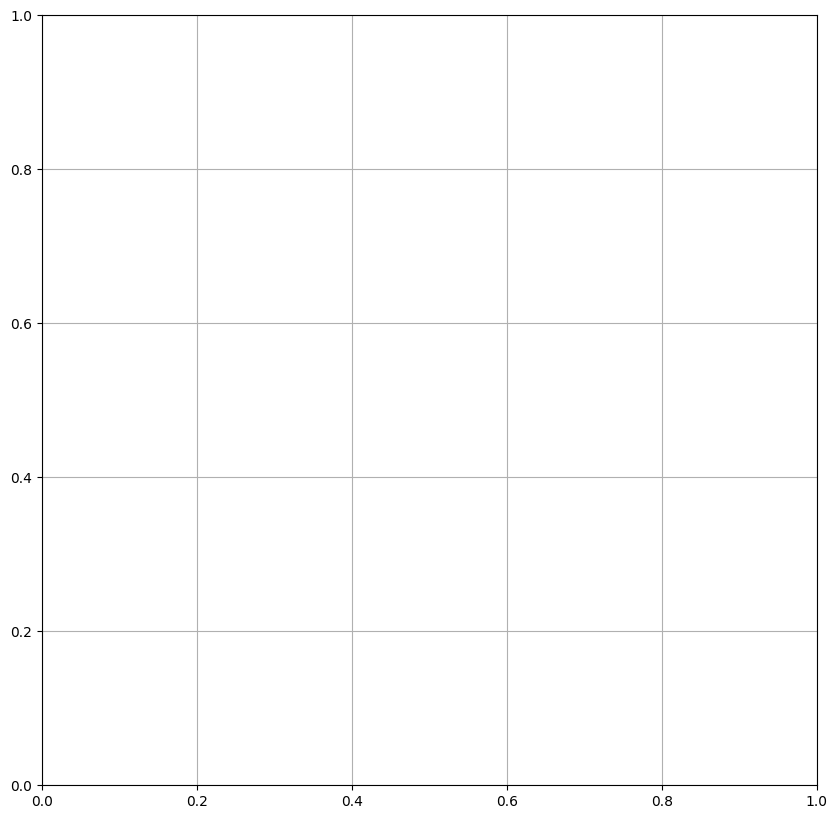

In [125]:
plt.figure(figsize=(10,10))
plt.grid(True)

for acc in accuracies_depth:
  plt.plot(depths, acc)
  plt.xlabel('max tree depth')
  plt.ylabel('accuracy')

plt.legend(legend)

m = max(accuracies_depth[0])

print([depths[i] for i, j in enumerate(accuracies_depth[0]) if j == m])

plt.show()

In [ ]:
plt.figure(figsize=(10,10))
plt.grid(True)

for acc in accuracies_ln:
  plt.plot(leaf_nodes, acc)
  plt.xlabel('max leaf nodes')
  plt.ylabel('accuracy')

plt.legend(legend)

m = max(accuracies_ln[1])

print([leaf_nodes[i] for i, j in enumerate(accuracies_ln[1]) if j == m])


plt.show()

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

### b

In [ ]:
nparr = pd.read_csv('spam7.csv', delimiter=',').to_numpy()
Y = nparr[:, -1]
Y[Y == 'y'] = 1
Y[Y == 'n'] = 0
Y=Y.astype('int')

X = np.delete(nparr, [len(nparr[0]) - 1], axis=1)
X=X.astype('float')

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15)

In [ ]:
clf = DecisionTreeClassifier(max_depth=11, criterion='gini')
clf.fit(x_train, y_train)
print(get_prediction_acc(clf, x_test, y_test))

plt.figure(figsize=(50,50))
plot_tree(clf, filled=True)
plt.show()

# Задание 6

In [ ]:
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from matplotlib.pyplot import figure
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree

In [ ]:
nparr1 = pd.read_csv('bank_scoring_train.csv', delimiter='\t').to_numpy()
nparr2 = pd.read_csv('bank_scoring_test.csv', delimiter='\t').to_numpy()

def get_x_y(arr):
  y = arr[:, 0]
  y=y.astype('int')

  x = np.delete(arr, [0], axis=1)
  x=x.astype('float')
  return x, y

x_train, y_train = get_x_y(nparr1)
x_test, y_test = get_x_y(nparr2)

In [ ]:
y_test[25]

In [ ]:
models = (tree.DecisionTreeClassifier(criterion='gini', max_depth=69),
          GaussianNB(),
          KNeighborsClassifier(n_neighbors=1),
          svm.SVC(kernel='sigmoid'),
          svm.SVC())

titles = ('desicion tree', 'naive Gaussian', 'K neighbours', 'SVC Sigmoid', 'SVC Gauss')

models[0].fit(x_train, y_train)
tree.plot_tree(models[0])

plt.show()

# for m, title in zip(models, titles):
#   y_pred = m.fit(x_train, y_train).predict(x_test)
#   print(title+':')
#   print(accuracy_score(y_test, y_pred))
#   print(confusion_matrix(y_test, y_pred))
#   print('yes:', len(y_test[y_test == 1]), 'no:', len(y_test[y_test == 0]))
#   print('-'*30)
